In [1]:
import json
import os
from statsmodels.stats.contingency_tables import mcnemar
from collections import defaultdict
from tqdm import tqdm 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import seaborn

# at home
minilstm_res_path = "/Volumes/Elements/workspace/darth_linguo/results/consolidated/minilstm.csv"
results_root = "/Volumes/Elements/workspace/darth_linguo/results"
# at the lab
# minilstm_res_path = "/media/complab7/Elements/workspace/darth_linguo/results/consolidated/minilstm.csv"
# results_root = "/media/complab7/Elements/workspace/darth_linguo/results"

In [2]:
def load_param_numbers(target_folder, experiment_prefix):
    params_re = re.compile(r"Number of trainable parameters: (\d+)")
    param_numbers = {}
    for filename in tqdm(os.listdir(target_folder)):
        fullpath = os.path.join(target_folder, filename)
        if os.path.isdir(fullpath):
            parameters = filename.split("_")
            if len(parameters) != 3:
                continue
            exp_id = parameters[0]
            condition = parameters[1]
            dimensions = parameters[2]
            exp_name = f"{dimensions}_{condition}"
            if exp_id == experiment_prefix:
                log_file_fn = os.path.join(fullpath, "stdout.log")
                with open(log_file_fn, "r") as logfile:
                    log_str = logfile.read()
                    match_obj = re.search(params_re, log_str)
                    num_params = int(match_obj.group(1))
                param_numbers[exp_name] = num_params
    return param_numbers

In [5]:
param_n = load_param_numbers(results_root,"exp-3.2")
stats_df = pd.read_csv(minilstm_res_path, index_col=0)

100%|██████████| 194/194 [00:03<00:00, 59.06it/s]


In [7]:
stats_df

,VA,AA,RV,total
64-101_uni-2-layer,0.837513,0.835222,0.884592,0.853316
64-104_uni-3-layer,0.828842,0.860735,0.881574,0.860053
64-108_bi-1-layer,0.824053,0.837929,0.889261,0.852626
64-112_uni-2-layer,0.821606,0.843223,0.885293,0.852675
64-11_bi-3-layer,0.775001,0.779793,0.842187,0.800714
64-11_uni-3-layer,0.749574,0.714801,0.808254,0.756756
64-121_bi-1-layer,0.833602,0.843901,0.875007,0.852328
64-122_uni-1-layer,0.827021,0.829611,0.883767,0.848167
64-122_uni-2-layer,0.837456,0.847291,0.888958,0.859582
64-12_uni-2-layer,0.744881,0.728183,0.814917,0.763179


In [8]:
for name in stats_df.index:
    dims = name.split("_")[0]
    embed_dim, hidden_dim = [int(dim) for dim in dims.split("-")] 
    archi = name.split("_")[1].split("-")
    directions = archi[0]
    layers = archi[1]
    stats_df.loc[name,"embeddings"] = embed_dim 
    stats_df.loc[name,"hidden"] = hidden_dim 
    stats_df.loc[name,"directionality"] = directions
    stats_df.loc[name,"layers"] = int(layers)
stats_df

,VA,AA,RV,total,embeddings,hidden,directionality,layers
64-101_uni-2-layer,0.837513,0.835222,0.884592,0.853316,64.0,101.0,uni,2.0
64-104_uni-3-layer,0.828842,0.860735,0.881574,0.860053,64.0,104.0,uni,3.0
64-108_bi-1-layer,0.824053,0.837929,0.889261,0.852626,64.0,108.0,bi,1.0
64-112_uni-2-layer,0.821606,0.843223,0.885293,0.852675,64.0,112.0,uni,2.0
64-11_bi-3-layer,0.775001,0.779793,0.842187,0.800714,64.0,11.0,bi,3.0
64-11_uni-3-layer,0.749574,0.714801,0.808254,0.756756,64.0,11.0,uni,3.0
64-121_bi-1-layer,0.833602,0.843901,0.875007,0.852328,64.0,121.0,bi,1.0
64-122_uni-1-layer,0.827021,0.829611,0.883767,0.848167,64.0,122.0,uni,1.0
64-122_uni-2-layer,0.837456,0.847291,0.888958,0.859582,64.0,122.0,uni,2.0
64-12_uni-2-layer,0.744881,0.728183,0.814917,0.763179,64.0,12.0,uni,2.0


In [12]:
stats_df.embeddings

64-101_uni-2-layer    64.0
64-104_uni-3-layer    64.0
64-108_bi-1-layer     64.0
64-112_uni-2-layer    64.0
64-11_bi-3-layer      64.0
64-11_uni-3-layer     64.0
64-121_bi-1-layer     64.0
64-122_uni-1-layer    64.0
64-122_uni-2-layer    64.0
64-12_uni-2-layer     64.0
64-132_uni-2-layer    64.0
64-133_bi-1-layer     64.0
64-13_bi-2-layer      64.0
64-144_uni-1-layer    64.0
64-145_bi-1-layer     64.0
64-164_uni-1-layer    64.0
64-16_uni-1-layer     64.0
64-17_bi-4-layer      64.0
64-17_uni-4-layer     64.0
64-182_uni-1-layer    64.0
64-19_bi-1-layer      64.0
64-19_uni-3-layer     64.0
64-200_uni-1-layer    64.0
64-20_bi-3-layer      64.0
64-216_uni-1-layer    64.0
64-23_uni-2-layer     64.0
64-25_bi-2-layer      64.0
64-25_bi-4-layer      64.0
64-29_bi-3-layer      64.0
64-30_bi-4-layer      64.0
                      ... 
64-57_bi-3-layer      64.0
64-5_bi-4-layer       64.0
64-61_bi-1-layer      64.0
64-61_bi-2-layer      64.0
64-61_bi-3-layer      64.0
64-61_uni-3-layer     64.0
6

In [33]:
vocab_size = 132192

for exp_name in stats_df.index:
    stats_df.loc[exp_name,"num_params"] = param_n[exp_name]
stats_df["network_params"] = stats_df["num_params"] - (vocab_size * stats_df["embeddings"])
stats_df.layers= stats_df.layers.astype("int")
stats_df

,VA,AA,RV,total,embeddings,hidden,directionality,layers,num_params,network_params
64-101_uni-2-layer,0.837513,0.835222,0.884592,0.853316,64.0,101.0,uni,2,8610440.0,150152.0
64-104_uni-3-layer,0.828842,0.860735,0.881574,0.860053,64.0,104.0,uni,3,8706002.0,245714.0
64-108_bi-1-layer,0.824053,0.837929,0.889261,0.852626,64.0,108.0,bi,1,8611122.0,150834.0
64-112_uni-2-layer,0.821606,0.843223,0.885293,0.852675,64.0,112.0,uni,2,8641570.0,181282.0
64-11_bi-3-layer,0.775001,0.779793,0.842187,0.800714,64.0,11.0,bi,3,8473334.0,13046.0
64-11_uni-3-layer,0.749574,0.714801,0.808254,0.756756,64.0,11.0,uni,3,8465876.0,5588.0
64-121_bi-1-layer,0.833602,0.843901,0.875007,0.852328,64.0,121.0,bi,1,8641854.0,181566.0
64-122_uni-1-layer,0.827021,0.829611,0.883767,0.848167,64.0,122.0,uni,1,8552342.0,92054.0
64-122_uni-2-layer,0.837456,0.847291,0.888958,0.859582,64.0,122.0,uni,2,8672390.0,212102.0
64-12_uni-2-layer,0.744881,0.728183,0.814917,0.763179,64.0,12.0,uni,2,8465370.0,5082.0


In [15]:
stats_df.to_csv("/Users/pablo/Dropbox/workspace/darth_linguo/results/consolidated/stats_exp3.0.csv")

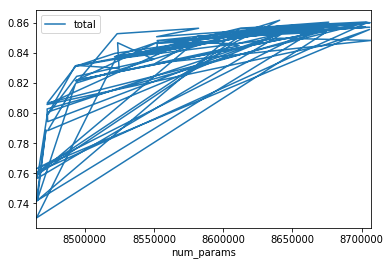

In [16]:
stats_df.plot(x='num_params',y='total')

In [56]:
my_palette = seaborn.color_palette("muted")
dir_colors = {"uni": my_palette[2],"bi": my_palette[4]}


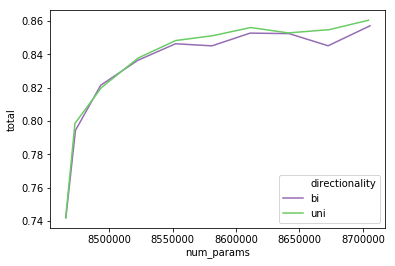

In [58]:
seaborn.lineplot(x='num_params',y='total', hue="directionality", data = stats_df.loc[stats_df.layers==1], markers=True,palette=dir_colors)


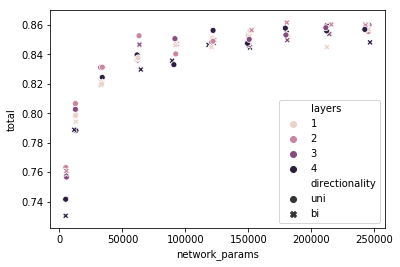

In [67]:
seaborn.scatterplot(x='network_params',y='total', hue="layers", style="directionality", data = stats_df, markers=True)


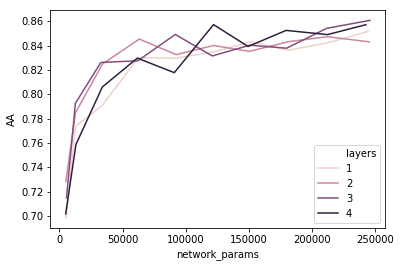

In [39]:
seaborn.lineplot(x='network_params',y='AA', hue="layers", data = stats_df.loc[stats_df.directionality=='uni'], markers=True)


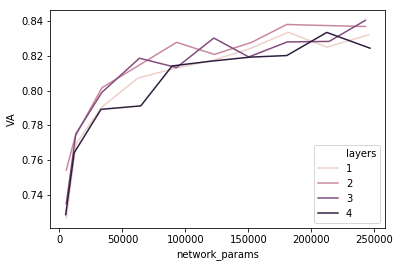

In [78]:
seaborn.lineplot(x='network_params',y='VA', hue="layers", data = stats_df.loc[stats_df.directionality=='bi'], markers=True)


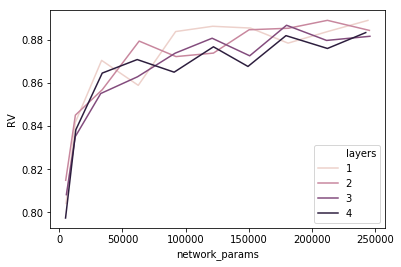

In [42]:
seaborn.lineplot(x='network_params',y='RV', hue="layers", data = stats_df.loc[stats_df.directionality=='uni'], markers=True)


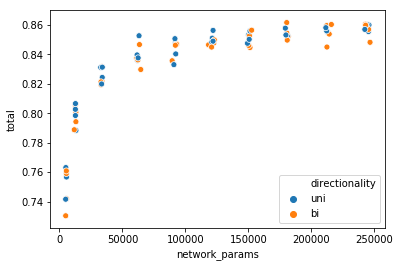

In [44]:
seaborn.scatterplot(x='network_params',y='total', hue="directionality", data = stats_df)

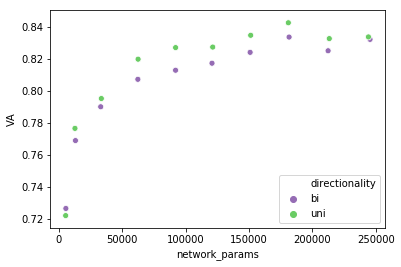

In [77]:

seaborn.scatterplot(x='network_params',y='VA', hue="directionality", data = stats_df.loc[stats_df.layers==1], markers=True, palette=dir_colors)


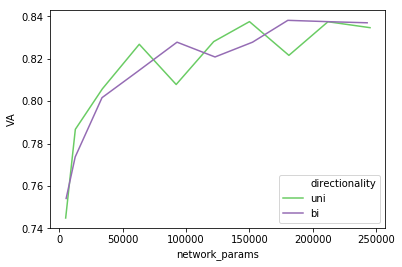

In [74]:
seaborn.lineplot(x='network_params',y='VA', hue="directionality", data = stats_df.loc[stats_df.layers==2], markers=True, palette=dir_colors)


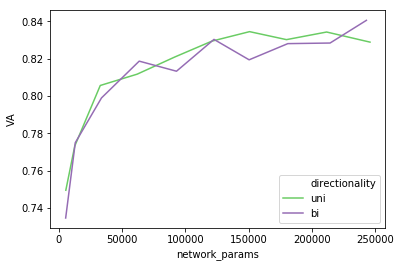

In [75]:
seaborn.lineplot(x='network_params',y='VA', hue="directionality", data = stats_df.loc[stats_df.layers==3], markers=True, palette=dir_colors)


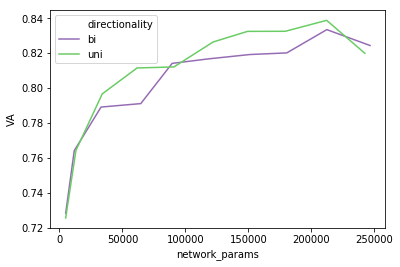

In [76]:
seaborn.lineplot(x='network_params',y='VA', hue="directionality", data = stats_df.loc[stats_df.layers==4], markers=True, palette=dir_colors)

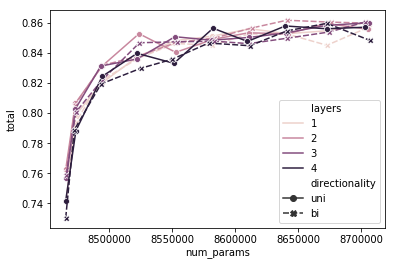

In [68]:
seaborn.lineplot(x='num_params',y='total', hue="layers", style="directionality",
                 data = stats_df, markers = True)

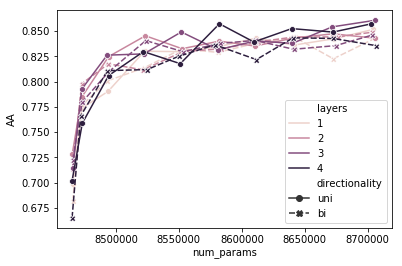

In [69]:
seaborn.lineplot(x='num_params',y='AA', hue="layers", style="directionality",
                 data = stats_df, markers = True)

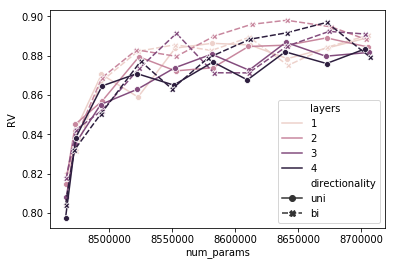

In [70]:
seaborn.lineplot(x='num_params',y='RV', hue="layers", style="directionality",
                 data = stats_df, markers = True)

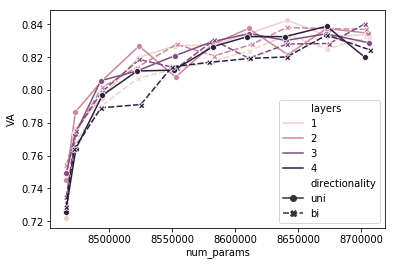

In [71]:
seaborn.lineplot(x='num_params',y='VA', hue="layers", style="directionality",
                 data = stats_df, markers = True)

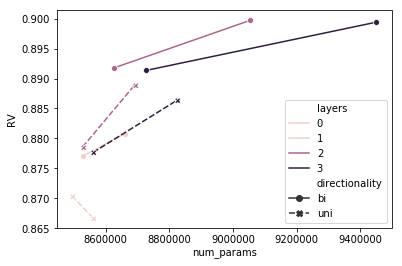

In [114]:
seaborn.lineplot(x='num_params',y='RV', hue="layers", style="directionality",
                 data = stats_df.loc[stats_df.emdeddings==64], markers = True)

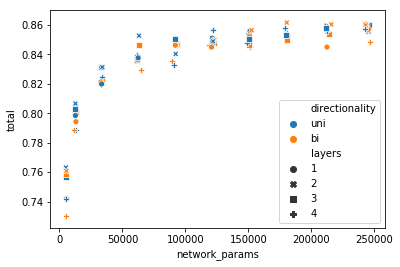

In [73]:
seaborn.scatterplot(x='network_params',y='total', hue="directionality", style="layers",
                 data = stats_df)

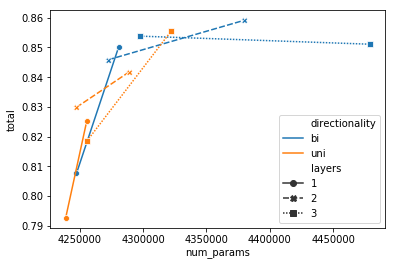

In [77]:
seaborn.lineplot(x='num_params',y='total', style="layers", hue = 'directionality',
                data=stats_df.loc[stats_df.emdeddings==32],
                 markers=True)

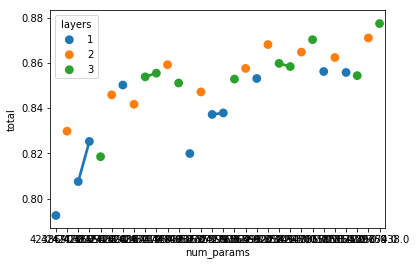

In [76]:
seaborn.pointplot(x='num_params',y='total', hue="layers",
                 data = stats_df)

In [74]:
stats_df.loc[stats_df.directionality=='uni'].loc[stats_df.emdeddings==32]

,VA,AA,RV,total,num_params,emdeddings,hidden,directionality,layers
32-32_uni-1-layer,0.750739,0.774362,0.842545,0.792569,4238690.0,32.0,32.0,uni,1
32-32_uni-2-layer,0.797219,0.825984,0.857335,0.829824,4247138.0,32.0,32.0,uni,2
32-32_uni-3-layer,0.792961,0.813878,0.841961,0.818545,4255586.0,32.0,32.0,uni,3
32-64_uni-1-layer,0.803636,0.815701,0.851319,0.825282,4255394.0,32.0,64.0,uni,1
32-64_uni-2-layer,0.818927,0.838109,0.861922,0.841700,4288674.0,32.0,64.0,uni,2
32-64_uni-3-layer,0.837610,0.847789,0.876657,0.855453,4321954.0,32.0,64.0,uni,3
